# Build and Evaluate a Risk Score Model for Diabetic Patients Using Logistic Regression 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import (roc_curve, precision_recall_curve, average_precision_score)

In [2]:
df=pd.read_csv("Data/diabetes.csv")

Dataset Reference: https://data.world/anaozp/diabetes

In [3]:
print("df shape: {}".format(df.shape))
df.head()

df shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1 : diabetic Patients         
0 : non-diabetic Patients

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_dup=df.drop_duplicates()
print(df.shape,df_dup.shape)

(768, 9) (768, 9)


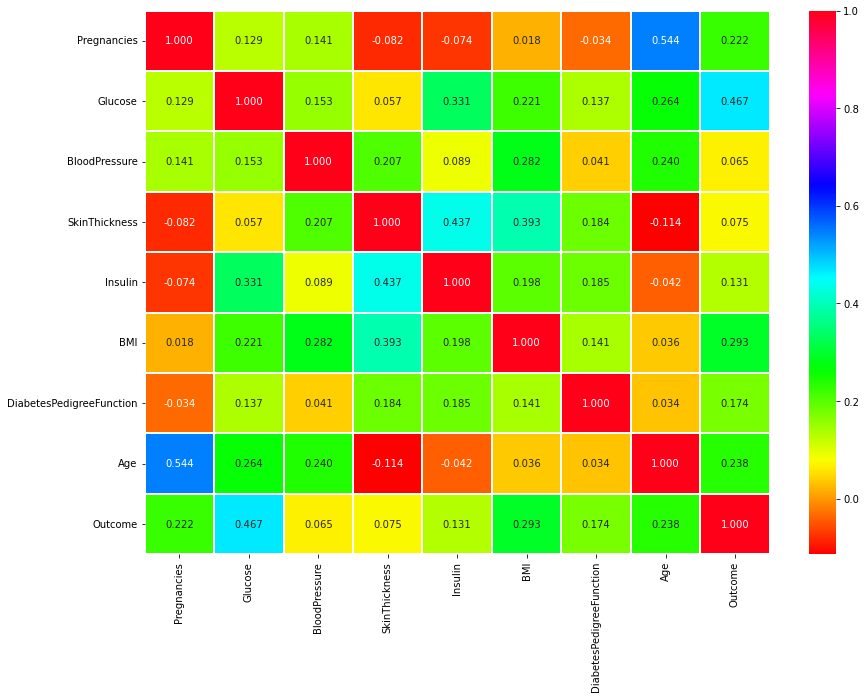

In [6]:
plt.figure(figsize=(14,10))

sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
mydata=df[df['BloodPressure']==0]
mydata.shape

(35, 9)

In [9]:
mydata_1=df[df['SkinThickness']==0]
mydata_1.shape 

(227, 9)

In [10]:
mydata_2=df[df['BMI']==0]
mydata_2.shape 

(11, 9)

In [11]:
mydata_3=df[df['Age']<=0]
mydata_3.shape 

(0, 9)

In [12]:
df_1=df

In [13]:
df_1['SkinThickness']=df_1['SkinThickness'].replace(0, np.nan)

In [14]:
df_1['BloodPressure']=df_1['BloodPressure'].replace(0, np.nan)

In [15]:
df_1['BMI']=df_1['BMI'].replace(0, np.nan)

In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [17]:
X=df_1.drop('Outcome', axis=1)
y=df_1['Outcome']

In [18]:
imputer = IterativeImputer(random_state=0, sample_posterior=False, max_iter=1, min_value=0)
imputer.fit(X)
X = pd.DataFrame(imputer.transform(X), columns=X.columns)

C:\Users\user\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB


In [20]:
mydata=X[X['BloodPressure']==0]
mydata.shape

(0, 8)

In [21]:
mydata_1=X[X['SkinThickness']==0]
mydata_1.shape

(0, 8)

In [22]:
mydata_2=X[X['BMI']==0]
mydata_2.shape

(0, 8)

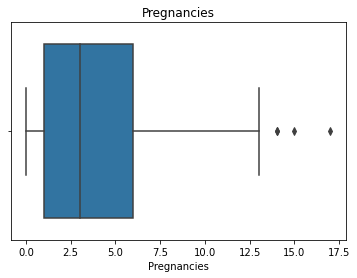

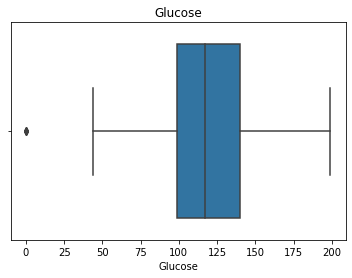

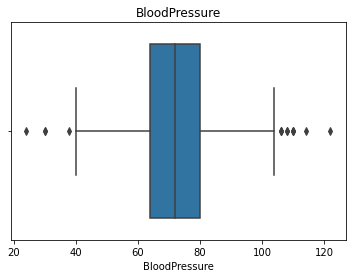

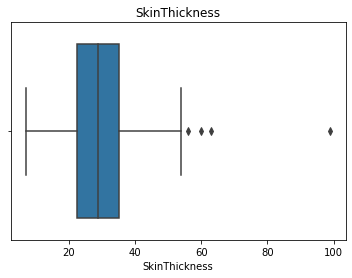

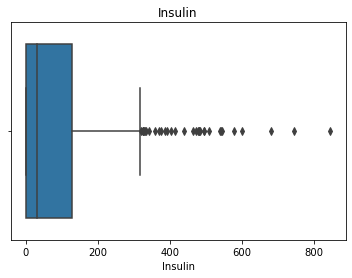

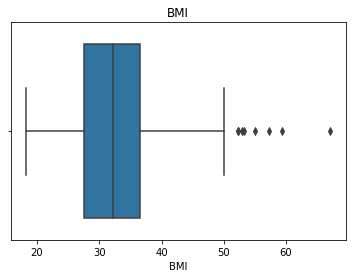

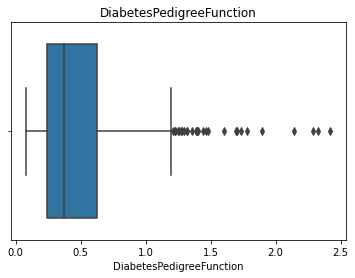

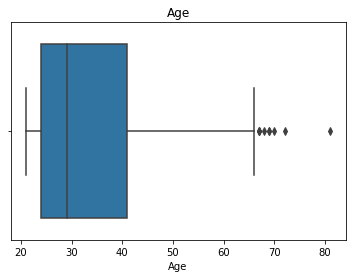

In [23]:
for col in X.columns:
    sns.boxplot(x=X.loc[:, col])
    plt.title(col)
    plt.show()

In [24]:
lof = LocalOutlierFactor(n_neighbors = 10)
res = lof.fit_predict(X)
X_o = X[res != -1]
y_o = y[res != -1]
print(X.shape, X_o.shape, y_o.shape)

(768, 8) (739, 8) (739,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_o, y_o, test_size=0.25, random_state=0)

In [26]:
X_test_1= X_test.copy(deep=True)

In [27]:
i = 5
print(X_train.iloc[i,:])
print("\nIs the patient diabetic? {}".format(y_train.loc[y_train.index[i]]))

Pregnancies                  5.000000
Glucose                     78.000000
BloodPressure               48.000000
SkinThickness               29.312309
Insulin                      0.000000
BMI                         33.700000
DiabetesPedigreeFunction     0.654000
Age                         25.000000
Name: 117, dtype: float64

Is the patient diabetic? 0


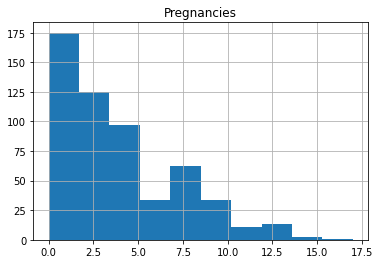

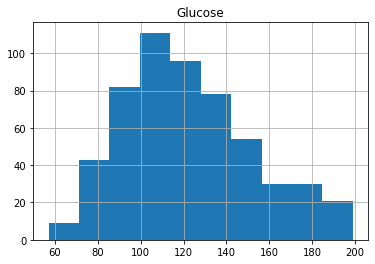

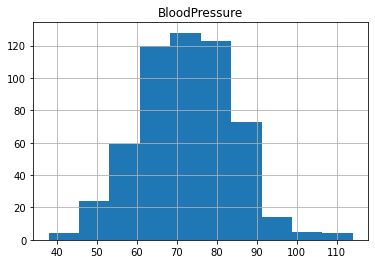

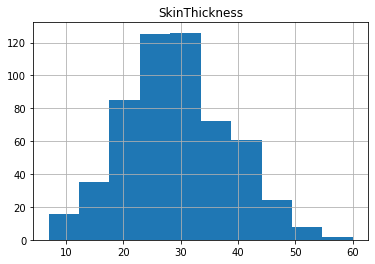

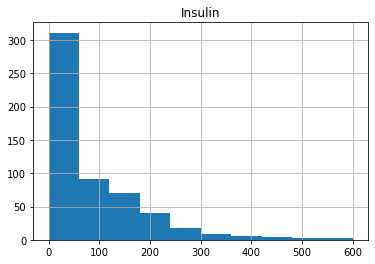

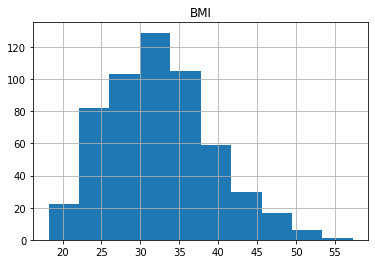

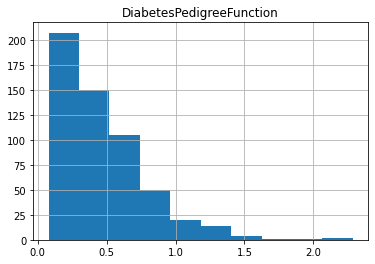

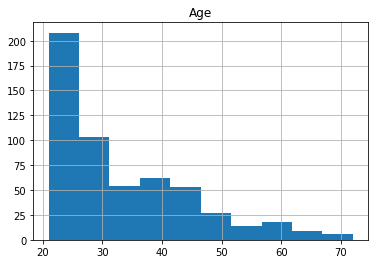

In [28]:
for col in X_train.columns:
    X_train.loc[:, col].hist()
    plt.title(col)
    plt.show()

In [29]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,3.880866,122.451264,72.502657,29.305701,77.507220,32.506220,0.476152,33.328520
std,3.381723,30.061034,11.534572,9.270608,105.239179,6.719757,0.321136,11.555215
min,0.000000,57.000000,38.000000,7.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,23.000000,0.000000,27.625000,0.245000,24.000000
50%,3.000000,118.500000,72.000000,29.000000,38.500000,32.300000,0.390000,29.000000
75%,6.000000,141.000000,80.000000,35.937108,129.750000,36.600000,0.630750,41.000000
max,17.000000,199.000000,114.000000,60.000000,600.000000,57.300000,2.288000,72.000000


In [30]:
def Standardization(df_train, df_test):
    
    mean = df_train.mean(axis=0)
    stdev = df_train.std(axis=0)
    df_train_standardized = (df_train-mean)/(stdev)
    df_test_standardized = (df_test-mean)/(stdev)
    
    return df_train_standardized, df_test_standardized 

In [31]:
X_train, X_test = Standardization(X_train, X_test)

In [32]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02
mean,-2.885778e-17,-1.777559e-16,-8.156332e-16,-6.969956e-16,-9.979983e-17,-6.234483e-15,-1.195143e-16,1.900806e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.147600e+00,-2.177279e+00,-2.991239e+00,-2.406067e+00,-7.364864e-01,-2.128979e+00,-1.239824e+00,-1.066923e+00
25%,-8.518930e-01,-7.468560e-01,-7.371454e-01,-6.801820e-01,-7.364864e-01,-7.263982e-01,-7.197942e-01,-8.072996e-01
50%,-2.604786e-01,-1.314414e-01,-4.357827e-02,-3.297525e-02,-3.706530e-01,-3.068858e-02,-2.682717e-01,-3.745945e-01
75%,6.266431e-01,6.170359e-01,6.499889e-01,7.153153e-01,4.964195e-01,6.092155e-01,4.814113e-01,6.638977e-01
max,3.879422e+00,2.546444e+00,3.597649e+00,3.310926e+00,4.964812e+00,3.689684e+00,5.642002e+00,3.346669e+00


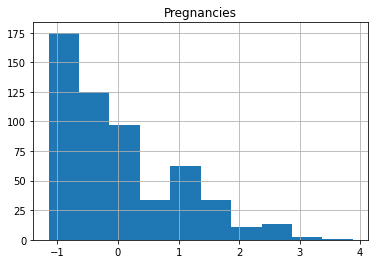

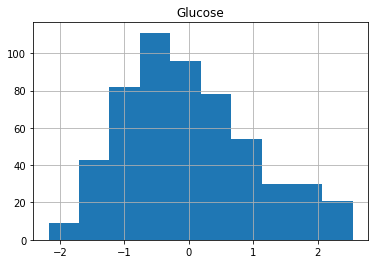

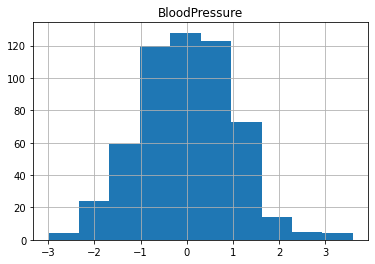

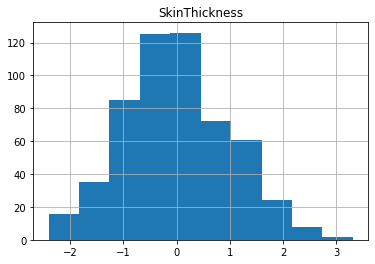

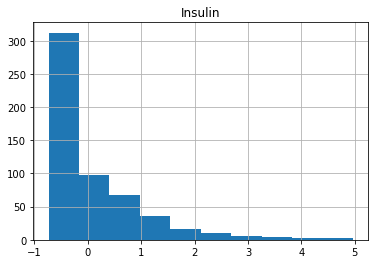

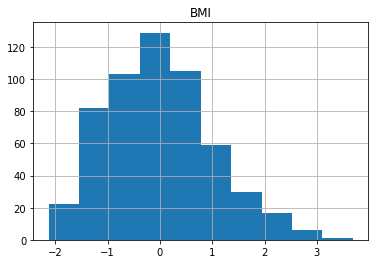

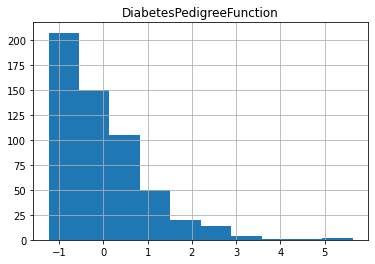

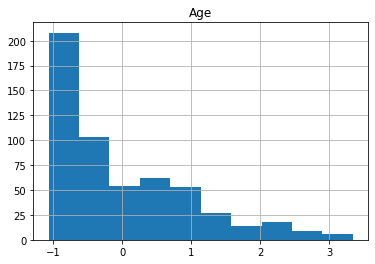

In [33]:
 for col in X_train.columns:
    X_train.loc[:, col].hist()
    plt.title(col)
    plt.show()

0    354
1    200
Name: Outcome, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

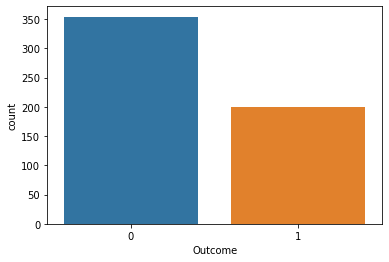

In [34]:
print(y_train.value_counts())
sns.countplot(y_train)

In [35]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [36]:
y_train.value_counts()

0    354
1    354
Name: Outcome, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

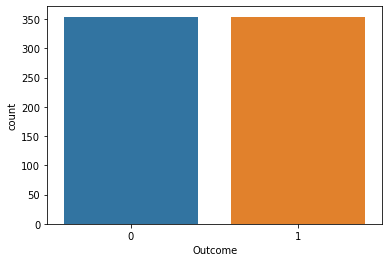

In [37]:
sns.countplot(y_train)

In [38]:
def logistic_regression_model(X_train, y_train):
    
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

In [39]:
model_X = logistic_regression_model(X_train, y_train)

In [40]:
y_train_preds = model_X.predict(X_train)
y_test_preds = model_X.predict(X_test)

In [41]:
cnf_matrix_test = metrics.confusion_matrix(y_test, y_test_preds)

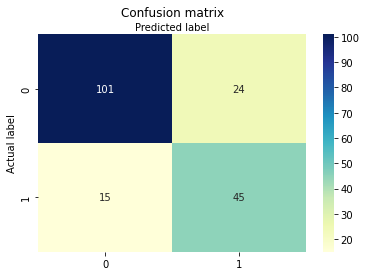

In [42]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True, cmap="YlGnBu",  fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

In [43]:
print("Train Accuracy:",metrics.accuracy_score(y_train, y_train_preds))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_test_preds))

Train Accuracy: 0.7556497175141242
Test Accuracy: 0.7891891891891892


In [44]:
def true_positives(y_true, scores, th=0.5):
    
    TP = 0   
    thresholded_scores = scores >= th  
    TP = np.sum((y_true == 1) & (thresholded_scores == 1))
    
    return TP

def true_negatives(y_true, scores, th=0.5):
    
    TN = 0
    thresholded_scores = scores >= th     
    TN = np.sum((y_true == 0) & (thresholded_scores == 0))
    
    return TN

def false_positives(y_true, scores, th=0.5):
   
    FP = 0 
    thresholded_scores = scores >= th 
    FP = np.sum((y_true == 0) & (thresholded_scores == 1))
            
    return FP

def false_negatives(y_true, scores, th=0.5):
    
    FN = 0
    thresholded_scores = scores >= th 
    FN = np.sum((y_true == 1) & (thresholded_scores == 0))  
    
    return FN

In [45]:
def get_accuracy(y_true, scores, th=0.5):
    
    accuracy = 0.0
        
    TP = true_positives(y_true, scores, th=0.5)
    FP = false_positives(y_true, scores, th=0.5)
    TN = true_negatives(y_true, scores, th=0.5)
    FN = false_negatives(y_true, scores, th=0.5)

    accuracy = (TP + TN) / (TP + FP + TN + FN)
    
    
    return accuracy

In [46]:
def get_prevalence(y_true):
    
    prevalence = 0.0
    
    prevalence = np.mean(y_true)
    
    
    return prevalence

In [47]:
def get_sensitivity(y_true, scores, th=0.5):
    
    sensitivity = 0.0
    
    TP = true_positives(y_true, scores, th=0.5)
    FN = false_negatives(y_true, scores, th=0.5)

    sensitivity = (TP) / (TP + FN)
    
    
    return sensitivity

def get_specificity(y_true, scores, th=0.5):
   
    specificity = 0.0
        
    TN = true_negatives(y_true, scores, th=0.5)
    FP = false_positives(y_true, scores, th=0.5)
    
    specificity = (TN) / (TN + FP)
    
   
    return specificity

In [48]:
def get_ppv(y_true, scores, th=0.5):
    
    PPV = 0.0
    
    TP = true_positives(y_true, scores, th=0.5)
    FP = false_positives(y_true, scores, th=0.5)

    PPV = (TP) / (TP + FP)
    
    
    return PPV

def get_npv(y_true, scores, th=0.5):
   
    NPV = 0.0
    
    TN = true_negatives(y_true, scores, th=0.5)
    FN = false_negatives(y_true, scores, th=0.5)

    NPV = (TN) / (TN + FN)
    
   
    return NPV

In [49]:
def get_f1_score(y_true, scores, th=0.5):
    
    F1_score = 0.0
    
    PPV = get_ppv(y_true, scores, th=0.5)
    sensitivity = get_sensitivity(y_true, scores, th=0.5)
    
    F1_score = (2 * PPV * sensitivity) / (PPV + sensitivity)
    
    
    return F1_score  

In [50]:
def get_cindex(y_true, scores):
    
    n = len(y_true)
    assert len(scores) == n

    concordant = 0
    permissible = 0
    ties = 0
    
    
    for i in range(n):
        for j in range(i + 1, n):  
            if y_true[i] != y_true[j]:
                permissible += 1

                if scores[i] == scores[j]:
                    ties += 1
                    continue

               
                if y_true[i] == 0 and y_true[j] == 1:
                    if scores[i] < scores[j]:
                        concordant += 1
                   
                if y_true[i] == 1 and y_true[j] == 0:
                    if scores[i] > scores[j]:
                        concordant += 1
                    
    c_index = (concordant + 0.5 * ties) / (permissible)
    
    
    return c_index

In [51]:
y_train_scores = model_X.predict_proba(X_train)[:, 1]
print(f"Train C-Index: {get_cindex(y_train.values, y_train_scores)}")


y_test_scores = model_X.predict_proba(X_test)[:, 1]
print(f"Test C-Index: {get_cindex(y_test.values, y_test_scores)}")

Train C-Index: 0.8388553736155
Test C-Index: 0.8694666666666667


In [52]:
def get_performance_metrics(y_true, scores, class_labels, TP=true_positives,
                            TN=true_negatives, FP=false_positives,
                            FN=false_negatives,
                            acc=get_accuracy, prevalence=get_prevalence, sens=get_sensitivity, 
                            spec=get_specificity, ppv=get_ppv, npv=get_npv, f1=get_f1_score, c_index=get_cindex, auc=None,
                            thresholds=None):
    
    columns = ["", "TP", "TN", "FP", "FN", "Accuracy", "Prevalence", "Sensitivity",
               "Specificity", "PPV", "NPV", "F1_score", "C_Index", "AUC", "Threshold"]
    df = pd.DataFrame(columns=columns)
    
    df[""] = class_labels
    df["TP"] = round(TP(y_true, scores, thresholds), 3) if TP != None else "Not Defined"
    df["TN"] = round(TN(y_true, scores, thresholds), 3) if TN != None else "Not Defined"
    df["FP"] = round(FP(y_true, scores, thresholds), 3) if FP != None else "Not Defined"
    df["FN"] = round(FN(y_true, scores, thresholds), 3) if FN != None else "Not Defined"
    df["Accuracy"] = round(acc(y_true, scores, thresholds), 3) if acc != None else "Not Defined"
    df["Prevalence"] = round(prevalence(y_true), 3) if prevalence != None else "Not Defined"
    df["Sensitivity"] = round(sens(y_true, scores, thresholds), 3) if sens != None else "Not Defined" 
    df["Specificity"]  = round(spec(y_true, scores, thresholds), 3) if spec != None else "Not Defined" 
    df["PPV"]  = round(ppv(y_true, scores, thresholds), 3) if ppv != None else "Not Defined" 
    df["NPV"]  = round(npv(y_true, scores, thresholds), 3) if npv != None else "Not Defined" 
    df["F1_score"]  = round(f1(y_true, scores, thresholds), 3) if f1 != None else "Not Defined"  
    df["C_Index"]  = round(c_index(y_true, scores), 3) if c_index != None else "Not Defined" 
    df["AUC"] = round(auc(y_true, scores), 3) if auc != None else "Not Defined"
    df["Threshold"] =  (thresholds)

    df = df.set_index("")
    return df

In [53]:
class_labels = ['Diabetes']

In [54]:
scores = model_X.predict_proba(X_test)[:, 1]
get_performance_metrics(y_test.values, scores, class_labels, auc=roc_auc_score, thresholds=0.5)

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,F1_score,C_Index,AUC,Threshold
,,,,,,,,,,,,,,
Diabetes,45,101,24,15,0.789,0.324,0.75,0.808,0.652,0.871,0.698,0.869,0.869,0.5


In [55]:
def get_curve(y_true, scores, class_labels, curve='roc'):
    
    if curve == 'roc':
        curve_function = roc_curve
        auc_roc = roc_auc_score(y_true, scores)
        label = class_labels[0] + " AUC: %.3f " % auc_roc
        xlabel = "False positive rate"
        ylabel = "True positive rate"
        a, b, _ = curve_function(y_true, scores)
        plt.figure(1, figsize=(7, 7))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(a, b, label=label)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

        plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
                       fancybox=True, ncol=1)
    elif curve == 'prc':
        precision, recall, _ = precision_recall_curve(y_true, scores)
        average_precision = average_precision_score(y_true, scores)
        label = class_labels[0] + " Avg.: %.3f " % average_precision
        plt.figure(1, figsize=(7, 7))
        plt.step(recall, precision, where='post', label=label)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
                    fancybox=True, ncol=1)


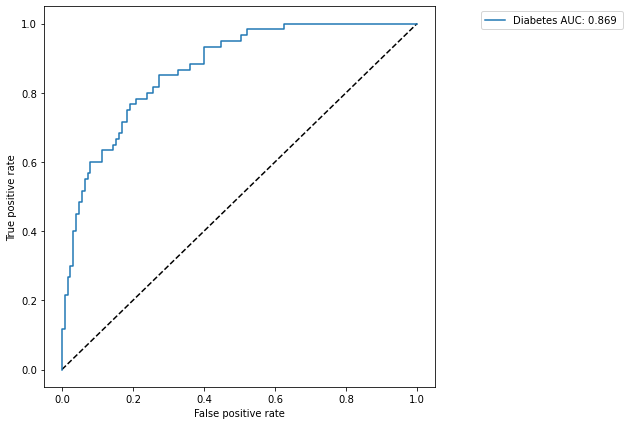

In [56]:
 get_curve(y_test.values, scores, class_labels)

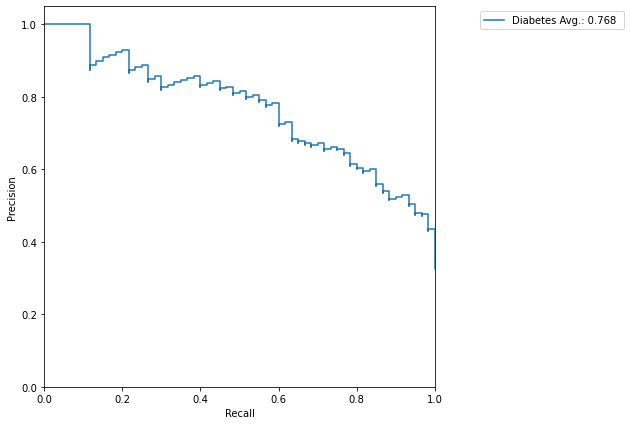

In [57]:
 get_curve(y_test.values, scores, class_labels, curve='prc')

In [58]:
def bootstrap_auc(y, pred, classes, bootstraps = 100, fold_size = 1000):
    statistics = np.zeros((len(classes), bootstraps))

    df = pd.DataFrame(columns=['y', 'pred'])
    df.loc[:, 'y'] = y
    df.loc[:, 'pred'] = pred
         
    df_pos = df[df.y == 1]
    df_neg = df[df.y == 0]
    prevalence = len(df_pos) / len(df)
    for i in range(bootstraps):
             
        pos_sample = df_pos.sample(n = int(fold_size * prevalence), replace=True)
        neg_sample = df_neg.sample(n = int(fold_size * (1-prevalence)), replace=True)

        y_sample = np.concatenate([pos_sample.y.values, neg_sample.y.values])
        pred_sample = np.concatenate([pos_sample.pred.values, neg_sample.pred.values])
        score = roc_auc_score(y_sample, pred_sample)
        statistics[0][i] = score
    return statistics

statistics = bootstrap_auc(y_test.values, scores, class_labels)

In [59]:
def print_confidence_intervals(class_labels, statistics):
    df = pd.DataFrame(columns=["Mean AUC (CI 5%-95%)"])
    for i in range(len(class_labels)):
        mean = statistics.mean(axis=1)[i]
        max_ = np.quantile(statistics, .95, axis=1)[i]
        min_ = np.quantile(statistics, .05, axis=1)[i]
        df.loc[class_labels[i]] = ["%.2f (%.2f-%.2f)" % (mean, min_, max_)]
    return df


In [60]:
print_confidence_intervals(class_labels, statistics)

,Mean AUC (CI 5%-95%)
Diabetes,0.87 (0.85-0.89)


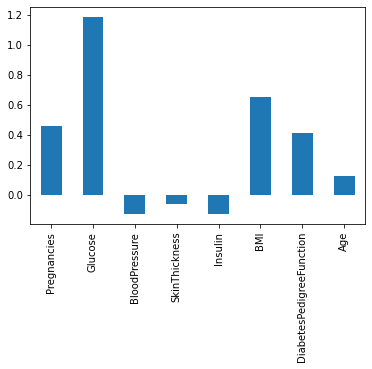

In [61]:
coeffs = pd.DataFrame(data = model_X.coef_, columns = X_train.columns)
coeffs.T.plot.bar(legend=None);

In [62]:
X_test_risk = X_test.copy(deep=True)
X_test_1.loc[:, 'risk'] = model_X.predict_proba(X_test_risk)[:, 1]
X_test_1 = X_test_1.sort_values(by='risk', ascending=False)
X_test_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,risk
546,5.0,187.0,76.0,27.000000,207.0,43.6,1.034,53.0,0.986710
408,8.0,197.0,74.0,24.947495,0.0,25.9,1.191,39.0,0.976944
43,9.0,171.0,110.0,24.000000,240.0,45.4,0.721,54.0,0.973157
761,9.0,170.0,74.0,31.000000,0.0,44.0,0.403,43.0,0.972382
455,14.0,175.0,62.0,30.000000,0.0,33.6,0.212,38.0,0.963632


In [63]:
X_test_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,risk
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,3.843243,119.481081,72.708532,27.614193,83.432432,32.111653,0.443492,32.335135,0.424113
std,3.323544,29.956507,11.520918,8.596567,117.925995,6.219537,0.318701,11.261521,0.289962
min,0.000000,56.000000,44.000000,8.000000,0.000000,18.200000,0.084000,21.000000,0.019315
25%,1.000000,99.000000,65.000000,21.000000,0.000000,27.500000,0.237000,24.000000,0.163441
50%,3.000000,115.000000,70.274834,27.813210,36.000000,32.100000,0.315000,28.000000,0.370750
75%,6.000000,139.000000,80.000000,32.443550,130.000000,35.800000,0.597000,38.000000,0.637536
max,14.000000,197.000000,110.000000,49.000000,579.000000,49.300000,1.781000,68.000000,0.986710


In [64]:
i = 4
print(X_test_1.iloc[i,:])
print("\nIs the patient diabetic? {}".format(y_test.loc[y_test.index[i]]))

Pregnancies                  14.000000
Glucose                     175.000000
BloodPressure                62.000000
SkinThickness                30.000000
Insulin                       0.000000
BMI                          33.600000
DiabetesPedigreeFunction      0.212000
Age                          38.000000
risk                          0.963632
Name: 455, dtype: float64

Is the patient diabetic? 1


In [65]:
i = 80
print(X_test_1.iloc[i,:])
print("\nIs the patient diabetic? {}".format(y_test.loc[y_test.index[i]]))

Pregnancies                   4.000000
Glucose                     123.000000
BloodPressure                62.000000
SkinThickness                29.052718
Insulin                       0.000000
BMI                          32.000000
DiabetesPedigreeFunction      0.226000
Age                          35.000000
risk                          0.430273
Name: 264, dtype: float64

Is the patient diabetic? 0


In [66]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def add_interactions(X):
    
    features = X.columns
    m = len(features)
    X_int = X.copy(deep=True)
    
    for i in range(m):
        feature_i_name = features[i]
        feature_i_data = X[feature_i_name]
        
        
        for j in range(i+1, m): 
            feature_j_name = features[j]
            feature_j_data = X[feature_j_name]
            feature_i_j_name = f"{feature_i_name}_x_{feature_j_name}"
            X_int[feature_i_j_name] = feature_i_data * feature_j_data
    
    return X_int

In [67]:
X_train_int = add_interactions(X_train)
X_test_int = add_interactions(X_test)

In [68]:
model_X_int = logistic_regression_model(X_train_int, y_train)

In [69]:
scores_X = model_X.predict_proba(X_test)[:, 1]
c_index_X_test = get_cindex(y_test.values, scores_X)

scores_X_int = model_X_int.predict_proba(X_test_int)[:, 1]
c_index_X_int_test = get_cindex(y_test.values, scores_X_int)

print(f"c-index on test set without interactions is {c_index_X_test:.4f}")
print(f"c-index on test set with interactions is {c_index_X_int_test:.4f}")

c-index on test set without interactions is 0.8695
c-index on test set with interactions is 0.8671


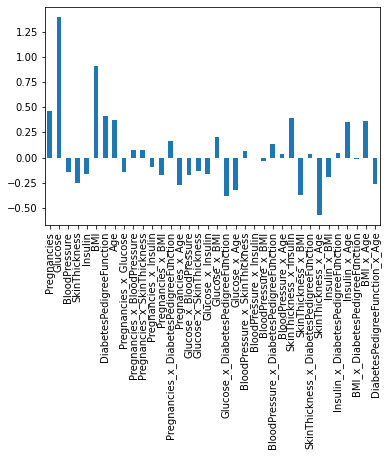

In [70]:
int_coeffs = pd.DataFrame(data = model_X_int.coef_, columns = X_train_int.columns)
int_coeffs.T.plot.bar(legend=None);